In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [11]:
##import the dataset 
df= pd.read_csv('/kaggle/input/titanic/train.csv')

In [12]:
##checking the head of data frame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
## Now first we check the null value in all columns to determine which column is corrupted
df.isna().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [14]:
## as above we see cabin heve 77 percent corrupted data so we drop the cabin column
df = df.drop(['Cabin'], axis = 1)

In [15]:
##age is also 19 perceent corrupted so instead of rmoving we replace the null value with mean
df['Age'].fillna(value = df['Age'].mean().round(0), inplace=True)

In [16]:
## Embarked also have null value so we drop the row that having null value
##because it is in very less in number 
df = df.dropna(subset=['Embarked'])

In [17]:
## here after removing and cleaning all null value we again check the null value in our dataset
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  889


,Total Missing,In Percent
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


In [18]:
##check the unique value 
df.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [19]:
## importing seaborn and matplot for graph ploting
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
## here we are assigning the count of each age variable
content_age = df['Age'].value_counts()
content_age

30.00    202
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64

In [24]:
## here we assigning the value to a age container
age = df['Age'].values

In [27]:
## here we are transforming the age data in pattern
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Age'] = le.fit_transform(df['Age'].astype(float))

In [28]:
## creating the bin because age have 88 unique value so graph is complex so we defining the age into bins
age_hist = np.histogram(age, bins=[0,10,20,30,40,50,60,70,80,90,100])

In [31]:
## checking the bin
age_hist

(array([ 62, 102, 220, 343,  89,  48,  18,   6,   1,   0]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]))

In [32]:
## assigning the label to each bin
age_hist_labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']

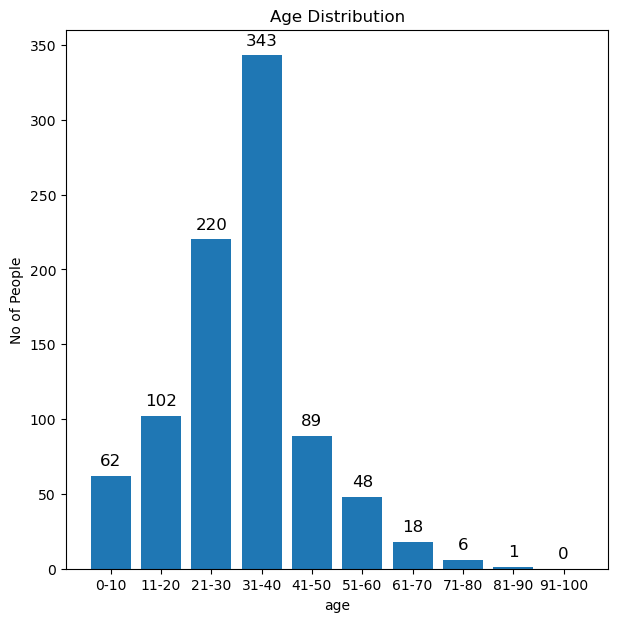

In [33]:
## ploating the graph with respect to bin defining above and count the individual in that bin
plt.figure(figsize=(7,7))
plt.title('Age Distribution')
plt.bar(age_hist_labels,age_hist[0])
plt.xlabel('age')
plt.ylabel('No of People')
for i,value in enumerate(age_hist[0]):
    plt.text(i, value+10, str(value), fontsize=12, color='black', horizontalalignment='center',verticalalignment='center')
plt.show()

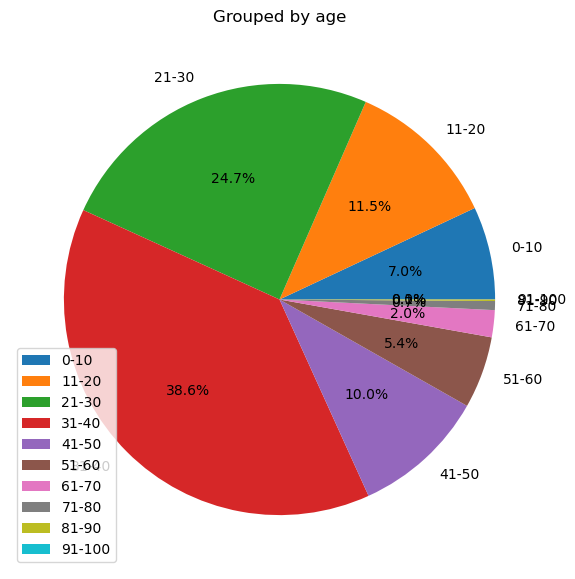

In [35]:
## ploating the pie chart
plt.figure(figsize=(7,7))
plt.title('Grouped by age')
plt.pie(age_hist[0],labels=age_hist_labels,autopct="%1.1f%%")
plt.legend()
plt.show()


In [36]:
## same as above work here we are using fare column
content_Fare = df['Fare'].value_counts()
content_Fare

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 247, dtype: int64

In [37]:
Fare = df['Fare'].values

In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Fare'] = le.fit_transform(df['Fare'].astype(float))

In [39]:
Fare_hist = np.histogram(Fare, bins=[0,100,200,300,400,500,600])

In [42]:
Fare_hist

(array([836,  33,  17,   0,   0,   3]),
 array([  0, 100, 200, 300, 400, 500, 600]))

In [44]:
Fare_hist_labels = ['0-100','101-200','201-300','301-400','401-500','501-600']

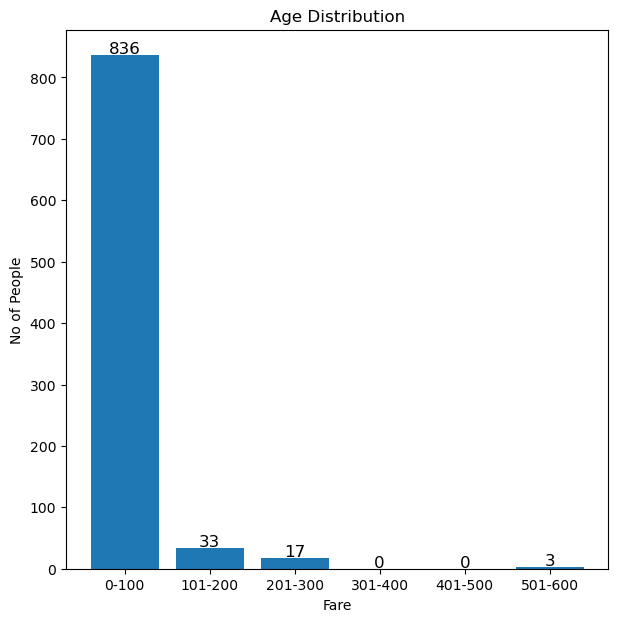

In [45]:
plt.figure(figsize=(7,7))
plt.title('Age Distribution')
plt.bar(Fare_hist_labels,Fare_hist[0])
plt.xlabel('Fare')
plt.ylabel('No of People')
for i,value in enumerate(Fare_hist[0]):
    plt.text(i, value+10, str(value), fontsize=12, color='black', horizontalalignment='center',verticalalignment='center')
plt.show()

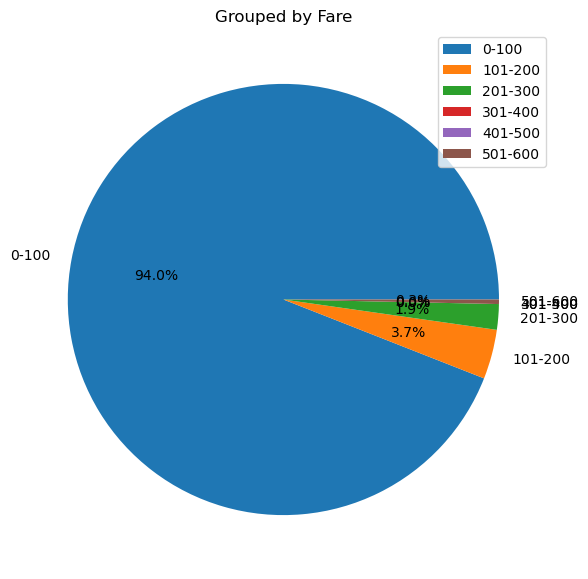

In [34]:
plt.figure(figsize=(7,7))
plt.title('Grouped by Fare')
plt.pie(Fare_hist[0],labels=Fare_hist_labels,autopct="%1.1f%%")
plt.legend()
plt.show()